Data Cleaning 

In [75]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib as plt

In [5]:
import pandas as pd
import glob

def combine_csv_files():
    # Read and concatenate all CSV files matching the pattern into a single DataFrame
    combined_df = pd.concat((pd.read_csv(file) for file in glob.glob('expenses_*.csv')), ignore_index=True) 
    
    # Save the combined DataFrame to a new CSV file named 'all_expenses.csv'
    combined_df.to_csv('all_expenses.csv', index=False)
    print("All CSV files have been combined into all_expenses.csv")
    
    return combined_df  # Return the combined DataFrame for further use

# Call the function to combine the CSV files and store the result
combined_data = combine_csv_files()


All CSV files have been combined into all_expenses.csv


In [7]:
 
combined_data = pd.read_csv('all_expenses.csv')

combined_data.head(5)  #shows the head of the data

,Random_Date,Category,Payment_Mode,Description,Amount_Paid,Cashback
0,2024-01-26,Travel,Debit Card,Flight tickets to a destination,765.73,56.31
1,2024-01-16,Gifts,Cash,Charity donation,64.72,3.48
2,2024-01-24,Transportation,Credit Card,Taxi fare to a meeting,748.46,21.04
3,2024-01-03,Entertainment,Cash,Dining out with friends,766.20,57.20
4,2024-01-27,Subscriptions,Net Banking,Gym membership,475.65,6.29


In [9]:
  combined_data.info()   #infomartion about the data like (data type, missing value presence , counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Random_Date   1200 non-null   object 
 1   Category      1200 non-null   object 
 2   Payment_Mode  1200 non-null   object 
 3   Description   1200 non-null   object 
 4   Amount_Paid   1200 non-null   float64
 5   Cashback      1200 non-null   float64
dtypes: float64(2), object(4)
memory usage: 56.4+ KB


In [11]:
combined_data.describe()  #statistics of Float values

,Amount_Paid,Cashback
count,1200.000000,1200.000000
mean,502.854567,21.940733
std,285.665252,21.798855
min,6.370000,0.000000
25%,258.770000,3.875000
50%,499.965000,15.300000
75%,759.585000,34.555000
max,999.060000,96.700000


In [15]:
combined_data.shape 

(1200, 6)

In [21]:
combined_data['Category'].value_counts()

Category
Entertainment     128
Bills             128
Groceries         127
Personal          124
Investment        122
Subscriptions     118
Transportation    117
Food              115
Travel            111
Gifts             110
Name: count, dtype: int64

In [7]:
combined_data.isnull().sum()   #to check the null value presence


Random_Date     0
Category        0
Payment_Mode    0
Description     0
Amount_Paid     0
Cashback        0
dtype: int64

In [8]:
combined_data.isna().sum()# To check the NaN value presence

Random_Date     0
Category        0
Payment_Mode    0
Description     0
Amount_Paid     0
Cashback        0
dtype: int64

In [9]:
combined_data.duplicated().sum()  #To check duplicates presence

0

In [45]:
# Check if any important variables are missing
required_columns = ['Description', 'Amount_Paid', 'Category', 'Random_Date','Payment_Mode']
missing_columns = [col for col in required_columns if col not in combined_data.columns]
print("Missing columns:", missing_columns)

Missing columns: []


<Axes: xlabel='Random_Date', ylabel='Amount_Paid'>

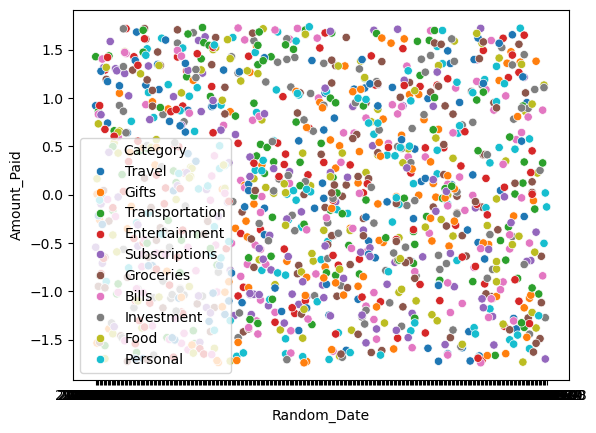

In [81]:
sns.scatterplot(data=combined_data, x='Random_Date', y='Amount_Paid', hue='Category')  #spending habits distribtion

<Axes: xlabel='Amount_Paid'>

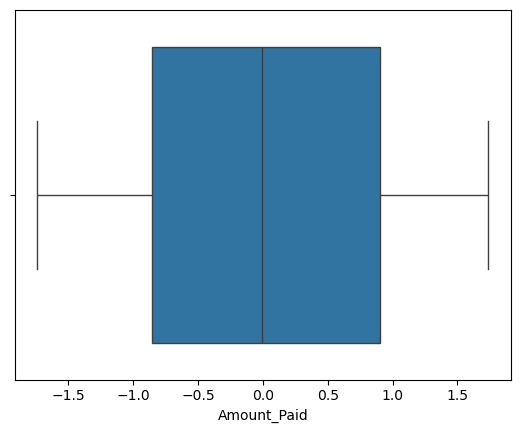

In [83]:
sns.boxplot(x=combined_data['Amount_Paid'])  